In [4]:
from __future__ import print_function, division
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time

import pytz

import astroplan
import astroplan.constraints
from astroplan import Observer, FixedTarget, ObservingBlock
from astroplan import PriorityScheduler, SequentialScheduler, Transitioner
from astroplan import plots
color_cycle = plots.mplstyles.astropy_mpl_style['axes.color_cycle']

In [6]:
from astroplan import download_IERS_A
download_IERS_A()

In [7]:
start_time = Time.now()
end_time = start_time+24*u.hour
print(start_time,end_time)

2016-06-17 14:14:12.395502 2016-06-18 14:14:12.395502


In [8]:
#time_diff = end_time.to(u.jd) - start_time.to(u.jd)

In [9]:
min_exposure=2*u.hour
times = start_time + u.Quantity(np.arange(0,(end_time - start_time).value, min_exposure.to(u.day).value), unit=u.day)

In [10]:
len(times)

12

In [11]:
mdm = Observer.at_site('mdm', timezone=pytz.timezone('US/Arizona'))
print(mdm)

<Observer: name='mdm',
    location (lon, lat, el)=(-111.616666667 deg, 31.95 deg, 1938.0 m),
    timezone=<DstTzInfo 'US/Arizona' LMT-1 day, 16:32:00 STD>>


In [12]:
targets = [FixedTarget.from_name('Vega'),
           FixedTarget.from_name('Deneb'),
           FixedTarget.from_name('Arcturus'),
           FixedTarget.from_name('Altair'),
           FixedTarget.from_name('Aldebaran'),
           FixedTarget.from_name('Sirius'),
           FixedTarget.from_name('Betelgeuse'),
           FixedTarget.from_name('M13'),
           FixedTarget.from_name('Melotte 111'),
           FixedTarget.from_name('Pollux'),
           FixedTarget.from_name('Spica'),
           FixedTarget.from_name('Regulus'),
           FixedTarget.from_name('M37'),           
           FixedTarget.from_name('Polaris')
          ]
targets

[<FixedTarget "Vega" at SkyCoord (ICRS): (ra, dec) in deg (279.23473479, 38.78368896)>,
 <FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>,
 <FixedTarget "Arcturus" at SkyCoord (ICRS): (ra, dec) in deg (213.9153003, 19.18240916)>,
 <FixedTarget "Altair" at SkyCoord (ICRS): (ra, dec) in deg (297.6958273, 8.8683212)>,
 <FixedTarget "Aldebaran" at SkyCoord (ICRS): (ra, dec) in deg (68.98016279, 16.50930235)>,
 <FixedTarget "Sirius" at SkyCoord (ICRS): (ra, dec) in deg (101.28715533, -16.71611586)>,
 <FixedTarget "Betelgeuse" at SkyCoord (ICRS): (ra, dec) in deg (88.79293899, 7.40706399)>,
 <FixedTarget "M13" at SkyCoord (ICRS): (ra, dec) in deg (250.423475, 36.4613194)>,
 <FixedTarget "Melotte 111" at SkyCoord (ICRS): (ra, dec) in deg (186.27501, 26.1)>,
 <FixedTarget "Pollux" at SkyCoord (ICRS): (ra, dec) in deg (116.32895777, 28.02619889)>,
 <FixedTarget "Spica" at SkyCoord (ICRS): (ra, dec) in deg (201.29824736, -11.16131948)>,
 <FixedTarget "Regulu

In [13]:
etime = 5*u.min
n = 10
rot = 55*u.second

blocks = []
for i,t in enumerate(targets):
    blocks.append(ObservingBlock.from_exposures(t, i, etime, n, rot))

In [14]:
constraints = [astroplan.constraints.AirmassConstraint(3, boolean_constraint=False),
               astroplan.constraints.AtNightConstraint()
               #,astroplan.constraints.MoonSeparationConstraint(5*u.deg)
               ]

In [15]:
observable = constraints[0].compute_constraint(times,mdm,[targets[0]])
print(observable)

[[ 0.05169593  0.          0.          0.          0.          0.          0.
   0.7379635   0.94519222  0.99639505  0.94833008  0.74812866]]


In [16]:
print(start_time,type(start_time))
print(start_time.jd)

2016-06-17 14:14:12.395502 <class 'astropy.time.core.Time'>
2457557.0932


In [17]:
scheduler = PriorityScheduler(start_time, end_time,
                                constraints=constraints, observer=mdm)
schedule = scheduler(blocks)

In [18]:
for sblock in schedule:
    local_start = mdm.astropy_time_to_datetime(sblock.start_time)
    if hasattr(sblock, 'target'):
        print(sblock.target.name, 'starting @', local_start, 'lasting', sblock.duration)
    else:
        print('trans starting @', local_start, 'lasting', sblock.duration, ':', sblock.components)

M37 starting @ 2016-06-17 12:04:12.394474-07:00 lasting 59.1666666667 min
Pollux starting @ 2016-06-17 13:54:12.394080-07:00 lasting 59.1666666667 min
Regulus starting @ 2016-06-17 16:04:12.393615-07:00 lasting 59.1666666667 min
Spica starting @ 2016-06-17 17:09:12.393383-07:00 lasting 59.1666666667 min
Melotte 111 starting @ 2016-06-17 18:14:12.393150-07:00 lasting 59.1666666667 min
M13 starting @ 2016-06-17 19:19:12.392918-07:00 lasting 59.1666666667 min
Arcturus starting @ 2016-06-17 20:24:12.392685-07:00 lasting 59.1666666667 min
Aldebaran starting @ 2016-06-17 21:29:12.392453-07:00 lasting 59.1666666667 min
Sirius starting @ 2016-06-17 22:34:12.392220-07:00 lasting 59.1666666667 min
Betelgeuse starting @ 2016-06-17 23:39:12.391988-07:00 lasting 59.1666666667 min
Vega starting @ 2016-06-18 00:44:12.391756-07:00 lasting 59.1666666667 min
Deneb starting @ 2016-06-18 02:49:12.391309-07:00 lasting 59.1666666667 min
Altair starting @ 2016-06-18 03:54:12.391076-07:00 lasting 59.166666666

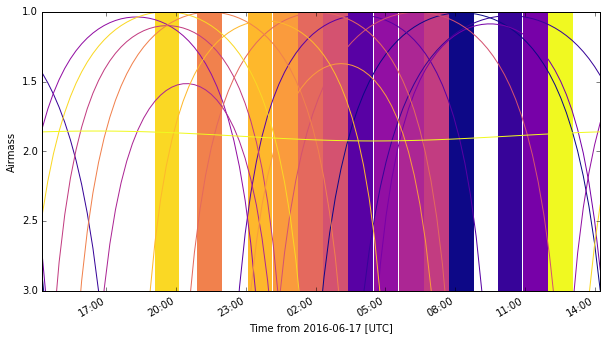

In [19]:
plt.figure(figsize=(10,5))
ts = start_time + np.linspace(0, (end_time-start_time).value, 100)*u.day
targ_to_color = {}
color_idx = np.linspace(0, 1, len(schedule))
for target, ci in zip(targets, color_idx):
    plots.plot_airmass(target, mdm, ts, style_kwargs=dict(color=plt.cm.plasma(ci)))
    targ_to_color[target.name] = plt.cm.plasma(ci)
#plt.legend(loc=2)

for block in schedule:
    if hasattr(block, 'target'):
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    fc=targ_to_color[block.target.name], lw=0)
ax=plt.gca()


There's still a slight flaw in that there are some small gaps being left between observation blocks, depending on what's the optimal constraint

# Check with a list of cluster targets

In [20]:
import astropy.io.ascii as at

Restrict to only exposure times >600 seconds (10 minutes), because otherwise the time array is too big. There's some optimizing that still needs to be done there. 

In [21]:
comaber = at.read("comaber_test.csv")
exptime = comaber["ExpTime (s)"]
ra = comaber["_RAJ2000"][exptime>=600]
dec = comaber["_DEJ2000"][exptime>=600]
coma_exptime = exptime[exptime>=600]
ntargets = len(ra)

coma_coords = [SkyCoord("{0} {1}".format(ra[i],dec[i]), unit=(u.hourangle,u.deg))
          for i in range(ntargets)]
print(coma_coords[0].ra, coma_coords[0].dec)

coma_targets = [FixedTarget(coma_coords[i],name="ComaBer{0}".format(i+1)) for i in range(ntargets)]

188d43m04.5s 25d09m24.3s


In [22]:
hyades = at.read("hyades_test.csv")
exptime = hyades["exptime"]
ra = hyades["_RAJ2000"][exptime>=600]
dec = hyades["_DEJ2000"][exptime>=600]
hyades_exptime = exptime[exptime>=600]
ntargets = len(ra)

hyades_coords = [SkyCoord("{0} {1}".format(ra[i],dec[i]), unit=(u.hourangle,u.deg))
          for i in range(ntargets)]
print(hyades_coords[0].ra, hyades_coords[0].dec)

hyades_targets = [FixedTarget(hyades_coords[i],name="Hyades{0}".format(i+1)) for i in range(ntargets)]

36d24m36.6s 37d32m33.93s


In [23]:
prae = at.read("praesepe_test.csv")
exptime = prae["exptime"]
ra = prae["_RAJ2000"][exptime>=600]
dec = prae["_DEJ2000"][exptime>=600]
names = prae["Name"][exptime>=600]
prae_exptime = exptime[exptime>=600]
ntargets = len(ra)

prae_coords = [SkyCoord("{0} {1}".format(ra[i],dec[i]), unit=(u.hourangle,u.deg))
          for i in range(ntargets)]
print(prae_coords[0].ra, prae_coords[0].dec)

prae_targets = [FixedTarget(prae_coords[i],name=names[i]) for i in range(ntargets)]

130d13m07.8s 19d28m59.57s


In [24]:
all_targets = []
for targ in prae_targets:
    all_targets.append(targ)
for targ in hyades_targets:
    all_targets.append(targ)
for targ in coma_targets:
    all_targets.append(targ)
exptime = np.append(np.append(prae_exptime,hyades_exptime),coma_exptime)

In [25]:
blocks = []
for i,targ in enumerate(all_targets):
    blocks.append(ObservingBlock(targ,exptime[i]*u.second,i))

In [26]:
start_time = Time('2016-01-28', scale='utc')
end_time = start_time+2.5*u.day
print(start_time,end_time)

2016-01-28 00:00:00.000 2016-01-30 12:00:00.000


In [27]:
scheduler = PriorityScheduler(start_time, end_time,
                                constraints=constraints, observer=mdm)
schedule = scheduler(blocks)

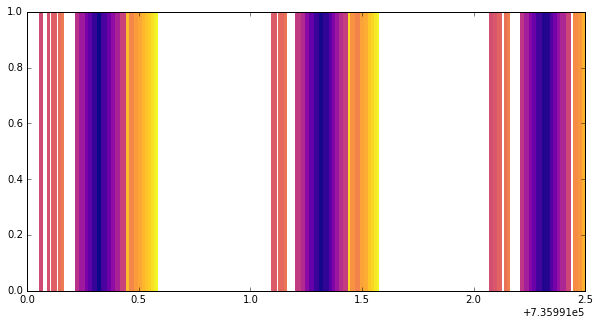

In [28]:
plt.figure(figsize=(10,5))
ts = start_time + np.linspace(0, (end_time-start_time).value, 100)*u.day
targ_to_color = {}
color_idx = np.linspace(0, 1, len(all_targets))
for target, ci in zip(all_targets, color_idx):
#    plots.plot_airmass(target, mdm, ts, style_kwargs=dict(color=plt.cm.plasma(ci)))
    targ_to_color[target.name] = plt.cm.plasma(ci)
#plt.legend(loc=2)

for block in schedule:
    if hasattr(block, 'target'):
        plt.axvspan(block.start_time.plot_date, block.end_time.plot_date, 
                    fc=targ_to_color[block.target.name], lw=0)
ax=plt.gca()


In [29]:
for block in schedule:
    local_start = mdm.astropy_time_to_datetime(block.start_time)
    if hasattr(block, 'target'):
        print('P', block.priority, block.target.name, 'starting @', local_start, 'lasting', block.duration)

P 36 Hyades1 starting @ 2016-01-27 18:14:59.999732-07:00 lasting 1200.0 s
P 38 Hyades3 starting @ 2016-01-27 19:04:59.999553-07:00 lasting 1200.0 s
P 41 Hyades6 starting @ 2016-01-27 19:34:59.999446-07:00 lasting 1800.0 s
P 44 Hyades9 starting @ 2016-01-27 20:19:59.999285-07:00 lasting 900.0 s
P 47 Hyades12 starting @ 2016-01-27 20:39:59.999213-07:00 lasting 900.0 s
P 30 KW546 starting @ 2016-01-27 22:09:59.998891-07:00 lasting 1200.0 s
P 24 KW556 starting @ 2016-01-27 22:34:59.998802-07:00 lasting 1800.0 s
P 17 JS_85 starting @ 2016-01-27 23:09:59.998677-07:00 lasting 1200.0 s
P 12 KW403 starting @ 2016-01-27 23:34:59.998587-07:00 lasting 900.0 s
P 5 JS350 starting @ 2016-01-27 23:54:59.998516-07:00 lasting 1800.0 s
P 0 KW341 starting @ 2016-01-28 00:29:59.998391-07:00 lasting 1200.0 s
P 8 KW_70 starting @ 2016-01-28 00:54:59.998301-07:00 lasting 900.0 s
P 9 KW272 starting @ 2016-01-28 01:14:59.998230-07:00 lasting 900.0 s
P 15 JS588 starting @ 2016-01-28 01:34:59.998158-07:00 lasting